<a href="https://colab.research.google.com/github/7-youssef/DEPI-Final_Project/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 63.0 MB/s eta 0:00:00


In [ ]:
!pip install nltk

In [ ]:
 !kaggle datasets download -d raddar/chest-xrays-indiana-university

Dataset URL: https://www.kaggle.com/datasets/raddar/chest-xrays-indiana-university
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 13.2G/13.2G [01:36<00:00, 211MB/s]
100% 13.2G/13.2G [01:36<00:00, 147MB/s]


In [ ]:
 !unzip chest-xrays-indiana-university.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/images_normalized/219_IM-0799-1001.dcm.png  
  inflating: images/images_normalized/219_IM-0799-2001.dcm.png  
  inflating: images/images_normalized/21_IM-0729-1001-0001.dcm.png  
  inflating: images/images_normalized/21_IM-0729-1001-0002.dcm.png  
  inflating: images/images_normalized/2200_IM-0811-1001.dcm.png  
  inflating: images/images_normalized/2200_IM-0811-2001.dcm.png  
  inflating: images/images_normalized/2201_IM-0811-1002.dcm.png  
  inflating: images/images_normalized/2202_IM-0811-1001.dcm.png  
  inflating: images/images_normalized/2202_IM-0811-1002.dcm.png  
  inflating: images/images_normalized/2203_IM-0812-1001.dcm.png  
  inflating: images/images_normalized/2203_IM-0812-2001.dcm.png  
  inflating: images/images_normalized/2204_IM-0813-1001.dcm.png  
  inflating: images/images_normalized/2204_IM-0813-1002.dcm.png  
  inflating: images/images_normalized/2205_IM-0814-1001.dcm.png  
  inflating: images/i

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-10-17 17:30:44--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-17 17:30:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-17 17:30:45--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_folder = '/content/drive/MyDrive/Image_captions'
folder_name = '/content/drive/MyDrive/final project'
tr_file_name = '/content/drive/MyDrive/Image_captions/نسخة من train.pkl'
te_file_name = '/content/drive/MyDrive/Image_captions/نسخة من test.pkl'
chexnet_weights = '/content/drive/MyDrive/Image_captions/نسخة من brucechou1983_CheXNet_Keras_0.3.0_weights.h5'

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib #for saving model files as pkl files
import os
import seaborn as sns
import cv2
import imgaug.augmenters as iaa
sns.set(palette='muted',style='white')
import tensorflow as tf
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D, Input, Embedding, LSTM,Dot,Reshape,Concatenate,BatchNormalization, GlobalMaxPooling2D, Dropout, Add, MaxPooling2D, GRU, AveragePooling2D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu
tf.compat.v1.enable_eager_execution()
import os
import math

In [ ]:
import os

folder_name = '/content/drive/MyDrive/final project'  # Replace with your actual folder name
tr_file_name = '/content/drive/MyDrive/Image_captions/نسخة من train.pkl'
te_file_name = '/content/drive/MyDrive/Image_captions/نسخة من test.pkl'

tr_file_path = os.path.join(folder_name, tr_file_name)
te_file_path = os.path.join(folder_name, te_file_name)

print("Train file path:", tr_file_path)
print("Test file path:", te_file_path)

print("Train file exists:", os.path.exists(tr_file_path))
print("Test file exists:", os.path.exists(te_file_path))

Train file path: /content/drive/MyDrive/Image_captions/نسخة من train.pkl
Test file path: /content/drive/MyDrive/Image_captions/نسخة من test.pkl
Train file exists: True
Test file exists: True


In [ ]:
train = pd.read_pickle(os.path.join(folder_name,tr_file_name))
test = pd.read_pickle(os.path.join(folder_name,te_file_name))
train.shape,test.shape

((4236, 7), (541, 7))

In [ ]:
train.head()

,image_1,image_2,impression,impression_final,impression_ip,impression_op,impression_counts
0,/content/images/images_normalized/3032_IM-1407...,/content/images/images_normalized/3032_IM-1407...,No active disease.,<CLS> No active disease. <END>,<CLS> No active disease.,No active disease. <END>,128
1,/content/images/images_normalized/3392_IM-1637...,/content/images/images_normalized/3392_IM-1637...,No acute cardiopulmonary abnormality.,<CLS> No acute cardiopulmonary abnormality. <END>,<CLS> No acute cardiopulmonary abnormality.,No acute cardiopulmonary abnormality. <END>,309
2,/content/images/images_normalized/3975_IM-2035...,/content/images/images_normalized/3976_IM-2035...,No acute cardiopulmonary findings.,<CLS> No acute cardiopulmonary findings. <END>,<CLS> No acute cardiopulmonary findings.,No acute cardiopulmonary findings. <END>,126
3,/content/images/images_normalized/2668_IM-1147...,/content/images/images_normalized/2668_IM-1147...,No acute disease.,<CLS> No acute disease. <END>,<CLS> No acute disease.,No acute disease. <END>,105
4,/content/images/images_normalized/1008_IM-0009...,/content/images/images_normalized/1008_IM-0009...,No acute cardiopulmonary abnormality.,<CLS> No acute cardiopulmonary abnormality. <END>,<CLS> No acute cardiopulmonary abnormality.,No acute cardiopulmonary abnormality. <END>,309


In [ ]:
#tokenizer
tokenizer = Tokenizer(filters = '',oov_token = '<unk>') #setting filters to none
tokenizer.fit_on_texts(train.impression_final.values)
train_captions = tokenizer.texts_to_sequences(train.impression_final)
test_captions = tokenizer.texts_to_sequences(test.impression_final)
vocab_size = len(tokenizer.word_index)
caption_len = np.array([len(i) for i in train_captions])
start_index = tokenizer.word_index['<cls>']
end_index = tokenizer.word_index['<end>']

print('\nThe max and min value of "caption length" was found to be %i and %i respectively'%(max(caption_len),min(caption_len)))
print('The 80 percentile value of caption_len which is %i will be taken as the maximum padded value for each impression for faster training.'
%(np.percentile(caption_len,80)))
max_pad = int(np.percentile(caption_len,80))
del train_captions,test_captions #we will create tokenizing  and padding in-built in dataloader


The max and min value of "caption length" was found to be 128 and 3 respectively
The 80 percentile value of caption_len which is 22 will be taken as the maximum padded value for each impression for faster training.


In [ ]:
batch_size = 100
embedding_dim = 300
dense_dim = 512
gru_units = dense_dim
dropout_rate = 0.4

In [ ]:
class Dataset():
  #here we will get the images converted to vector form and the corresponding captions
  def __init__(self,df,input_size,tokenizer = tokenizer, augmentation = True,max_pad = max_pad):
    """
    df  = dataframe containing image_1,image_2 and impression
    """
    self.image1 = df.image_1
    self.image2 = df.image_2
    self.caption = df.impression_ip #inp
    self.caption1 = df.impression_op  #output
    self.input_size = input_size #tuple ex: (512,512)
    self.tokenizer = tokenizer
    self.augmentation = augmentation
    self.max_pad = max_pad


    self.aug1 = iaa.Fliplr(1) #flip images horizaontally
    self.aug2 = iaa.Flipud(1) #flip images vertically

  def __getitem__(self,i):
    #gets the datapoint at i th index, we will extract the feature vectors of images after resizing the image  and apply augmentation
    image1 = cv2.imread(self.image1[i],cv2.IMREAD_UNCHANGED)/255
    image2 = cv2.imread(self.image2[i],cv2.IMREAD_UNCHANGED)/255

    image1 = cv2.resize(image1,self.input_size,interpolation = cv2.INTER_NEAREST)
    image2 = cv2.resize(image2,self.input_size,interpolation = cv2.INTER_NEAREST)

    if image1.any()==None:
        print("%i , %s image sent null value"%(i,self.image1[i]))
    if image2.any()==None:
        print("%i , %s image sent null value"%(i,self.image2[i]))


    #tokenizing and padding
    caption = self.tokenizer.texts_to_sequences(self.caption[i:i+1])

    caption = pad_sequences(caption,maxlen = self.max_pad,padding = 'post')
    caption = tf.squeeze(caption,axis=0) #removing unwanted axis if present

    caption1 = self.tokenizer.texts_to_sequences(self.caption1[i:i+1])

    caption1 = pad_sequences(caption1,maxlen = self.max_pad,padding = 'post')
    caption1 = tf.squeeze(caption1,axis=0)
    if self.augmentation: #we will not apply augmentation that crops the image
          a = np.random.uniform()
          if a<0.333:
              image1 = self.aug1.augment_image(image1)
              image2 = self.aug1.augment_image(image2)
          elif a<0.667:
              image1 = self.aug2.augment_image(image1)
              image2 = self.aug2.augment_image(image2)
          else:
            pass;

    return image1,image2,caption,caption1

  def __len__(self):
    return len(self.image1)


class Dataloader(tf.keras.utils.Sequence):     #for batching
    def __init__(self, dataset, batch_size=1, shuffle=True):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.dataset))

    def __getitem__(self, i):

        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        indexes = [self.indexes[j] for j in range(start,stop)] #getting the shuffled index values
        data = [self.dataset[j] for j in indexes] #taken from Data class (calls __getitem__ of Data) here the shape is batch_size*3, (image_1,image_2,caption)

        batch = [np.stack(samples, axis=0) for samples in zip(*data)] #here the shape will become batch_size*input_size(of image)*3,batch_size*input_size(of image)*3
                                                                      #,batch_size*1*max_pad

        #print(batch[0].shape,batch[1].shape)

        #return tuple([[batch[0],batch[1],batch[2]],batch[3]]) #here [image1,image2, caption(without <END>)],caption(without <CLS>)
        images1_tensor =  tf.image.grayscale_to_rgb(tf.expand_dims(tf.convert_to_tensor(batch[0], dtype=tf.float32),axis=-1))  # Shape: (batch_size, height, width, channels)
        images2_tensor =  tf.image.grayscale_to_rgb(tf.expand_dims(tf.convert_to_tensor(batch[1], dtype=tf.float32),axis=-1))  # Shape: (batch_size, height, width, channels)
        captions_tensor = tf.convert_to_tensor(batch[2], dtype=tf.int32)    # Shape: (batch_size, max_pad)
        captions1_tensor = tf.convert_to_tensor(batch[3], dtype=tf.int32)   # Shape: (batch_size, max_pad)
        #print("#######",images1_tensor,images2_tensor)
        return (images1_tensor, images2_tensor, captions_tensor), captions1_tensor  # Return as TensorFlow tensors

    def __len__(self): #returns total number of batches in an epoch
        return len(self.indexes) // self.batch_size

    def on_batch_end(self): #it runs at the end of epoch
        if self.shuffle:
            np.random.shuffle(self.indexes)

In [ ]:
input_size = (224,224)
train_dataloader = Dataset(train.iloc[:3000,:],input_size)
train_dataloader = Dataloader(train_dataloader,batch_size = batch_size)

test_dataloader = Dataset(test.iloc[:200,:],input_size)
test_dataloader = Dataloader(test_dataloader,batch_size = batch_size)

In [ ]:
def create_chexnet(chexnet_weights = chexnet_weights,input_size = input_size):
  model = tf.keras.applications.DenseNet121(include_top=False,input_shape = input_size+(3,))

  #we need to load the weights so setting the architecture of the model as same as the one of the chexnet
  x = model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(14, activation="sigmoid", name="chexnet_output")(x) #14 classes

  chexnet = tf.keras.Model(inputs = model.input,outputs = x)
  chexnet.load_weights(chexnet_weights)
  chexnet = tf.keras.Model(inputs = model.input,outputs = chexnet.layers[-3].output)  #we will be taking the 3rd last layer
  return chexnet

In [ ]:
embedding_dim = 300
dense_dim = 512
gru_units = dense_dim
dropout_rate = 0.4

In [ ]:
class Image_encoder(tf.keras.layers.Layer):

  def __init__(self,
               name = "image_encoder_block"
               ):
    super().__init__()
    self.chexnet = create_chexnet()
    self.chexnet.trainable = False
    self.avgpool = AveragePooling2D(pool_size=(3, 3))

  def call(self,data):
    op = self.chexnet(data) #op shape: (None,7,7,1024)
    op = self.avgpool(op) #op shape (None,3,3,1024)
    #tf.print("Shape of op before reshape:", tf.shape(op))
    op = tf.reshape(op,shape = (-1,tf.shape(op)[1]*tf.shape(op)[2],tf.shape(op)[3])) #shape: (None,9,1024)
    return op

In [ ]:
def encoder(image1,image2,dense_dim = dense_dim,dropout_rate = dropout_rate):
  """
  Takes image1,image2
  gets the final encoded vector of these
  """
  #image1
  im_encoder = Image_encoder()
  imgfeat1 = im_encoder(image1) #shape: (None,9,1024)
  img_dense = Dense(dense_dim,name = 'imgdense',activation = 'relu') #shape: (None,9,512)
  imgfeat1 = img_dense(imgfeat1)

  #image2
  imgfeat2 = im_encoder(image2)
  imgfeat2 = img_dense(imgfeat2)


  #combining image1 and image2
  concat = Concatenate(axis=1)([imgfeat1,imgfeat2]) #concatenating
  bn = BatchNormalization(name = "encoder_batch_norm")(concat)
  dropout = Dropout(dropout_rate,name = "encoder_dropout")(bn)
  return dropout

In [ ]:
class global_attention(tf.keras.layers.Layer):
  """
  calculate global attention
  """
  def __init__(self,dense_dim = dense_dim):
    super().__init__()
    self.W1 = Dense(units = dense_dim)
    self.W2 = Dense(units = dense_dim)
    self.V = Dense(units = 1) #weight matrix of shape dense_dim*1

  def call(self,encoder_output,decoder_h):
    decoder_h = tf.expand_dims(decoder_h,axis=1)
    tanh_input = self.W1(encoder_output) + self.W2(decoder_h)
    tanh_output =  tf.nn.tanh(tanh_input)
    attention_weights = tf.nn.softmax(self.V(tanh_output),axis=1) #shape= batch_size*timestep*1
    op = attention_weights*encoder_output
    context_vector = tf.reduce_sum(op,axis=1) #summing all context vector over the time period ie input length, output_shape: batch_size*dense_dim
    return context_vector,attention_weights

In [ ]:
glove = {}
with open('/content/glove.6B.300d.txt',encoding='utf-8') as f:
  for line in f:
    word = line.split()
    glove[word[0]] = np.asarray(word[1:], dtype='float32')


embedding_dim = 300
# create a weight matrix for words in training docs for embedding purpose
embedding_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in tokenizer.word_index.items():
  embedding_vector = glove.get(word)
  if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector[:embedding_dim]

In [ ]:
class One_Step_Decoder(tf.keras.layers.Layer):
  """
  decodes a single token
  """
  def __init__(self,vocab_size = vocab_size, embedding_dim = embedding_dim, max_pad = max_pad, dense_dim = dense_dim ,name = "onestepdecoder"):
    super().__init__()
    self.dense_dim = dense_dim
    self.embedding = Embedding(input_dim = vocab_size+1,
                                output_dim = embedding_dim,
                                input_length=max_pad,
                                weights = [embedding_matrix],
                                mask_zero=True,
                                name = 'onestepdecoder_embedding'
                              )
    self.GRU = GRU(units=self.dense_dim,
                    return_state=True,
                    name = 'onestepdecoder_GRU'
                    )
    self.attention = global_attention(dense_dim = dense_dim)
    self.concat = Concatenate(axis=-1)
    self.dense = Dense(dense_dim,name = 'onestepdecoder_embedding_dense',activation = 'relu')
    self.final = Dense(vocab_size+1,activation='softmax')
    self.concat = Concatenate(axis=-1)
    self.add =Add()
  @tf.function
  def call(self,input_to_decoder, encoder_output, decoder_h):
    embedding_op = self.embedding(input_to_decoder) #output shape = batch_size*1*embedding_shape (only 1 token)
    context_vector,attention_weights = self.attention(encoder_output,decoder_h) #passing hidden state h of decoder and encoder output

    context_vector_time_axis = tf.expand_dims(context_vector,axis=1) # shape: batch_size*dense_dim ,adding a time dimension

    #combine  context vector with next word input to the lstm here for teacher forcing
    concat_input = self.concat([context_vector_time_axis,embedding_op])#

    output,decoder_h  = self.GRU(concat_input,initial_state =decoder_h)

    output = self.final(output) #shape = batch_size*decoder vocab size
    return output,decoder_h,attention_weights

In [ ]:
class decoder(tf.keras.Model):
  """
  Decodes the encoder output and caption
  """
  def __init__(self,max_pad = max_pad, embedding_dim = embedding_dim,dense_dim = dense_dim,score_fun='general',batch_size = batch_size,vocab_size = vocab_size):
    super().__init__()
    self.onestepdecoder = One_Step_Decoder(vocab_size = vocab_size, embedding_dim = embedding_dim, max_pad = max_pad, dense_dim = dense_dim)
    self.output_array = tf.TensorArray(tf.float32,size=max_pad)
    self.max_pad = max_pad
    self.batch_size = batch_size



  @tf.function
  def call(self,encoder_output,caption):
    #caption : (None,max_pad), encoder_output: (None,dense_dim)
    decoder_h ,decoder_c = tf.zeros_like(encoder_output[:,0]), tf.zeros_like(encoder_output[:,0])
    output_array = tf.TensorArray(tf.float32,size=max_pad)
    for timestep in range(self.max_pad):  #loop throught the max_pad
      output,decoder_h,attention_weights = self.onestepdecoder(caption[:,timestep:timestep+1], encoder_output, decoder_h)
      output_array = output_array.write(timestep,output) #timestep*batch_size*vocab_size

    self.output_array = tf.transpose(output_array.stack(),[1,0,2])
          #shape output_array: (batch_size,max_pad,vocab_size)
    return self.output_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#model creation
image1 = Input(shape = (input_size + (3,))) #shape = 224,224,3
image2 = Input(shape = (input_size + (3,)))
caption = Input(shape = (max_pad,))

encoder_output = encoder(image1,image2) #shape: (None,8,512)

output = decoder()(encoder_output,caption)

model = tf.keras.Model(inputs = [image1,image2,caption], outputs = output)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 image_encoder (Image_encod  (None, 4, 1024)              7037504   ['input_1[0][0]',             
 er)                                                                 'input_2[0][0]']             
                                                                                                  
 imgdense (Dense)            (None, 4, 512)               524800    ['image_encoder[0][0]', 

In [ ]:
lr = 10**-3
optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy() ,metrics= ['accuracy'])

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the model from the saved checkpoint
# model_save = '/content/drive/MyDrive/Image_captions/LSTM_E&D_global_attention.keras'
# model = load_model(model_save,
#  custom_objects={'Image_encoder': Image_encoder,
#                                    'One_Step_Decoder': One_Step_Decoder,
#                                    'global_attention': global_attention})

In [ ]:
model_filename = 'LSTM_E&D_global_attention.keras'
model_save = os.path.join('/content/drive/MyDrive/Image_captions',model_filename)
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience = 2, monitor='val_loss',
                                     verbose = 2
                                     ),
    tf.keras.callbacks.ModelCheckpoint(filepath=model_save,
                                       save_best_only = True,
                                      save_weights_only = False,
                                       verbose = 2
                                       )
 ]

In [ ]:
history =  model.fit(train_dataloader,
          validation_data = test_dataloader,
          epochs = 10,
          callbacks = my_callbacks
          )

Epoch 1/10
30/30 [==============================] - ETA: 0s - loss: 6.4341 - accuracy: 0.4333 
Epoch 1: val_loss improved from inf to 6.35762, saving model to /content/drive/MyDrive/Image_captions/LSTM_E&D_global_attention.keras
30/30 [==============================] - 437s 14s/step - loss: 6.4341 - accuracy: 0.4333 - val_loss: 6.3576 - val_accuracy: 0.9107
Epoch 2/10
30/30 [==============================] - ETA: 0s - loss: 5.7835 - accuracy: 0.5823 
Epoch 2: val_loss improved from 6.35762 to 6.08326, saving model to /content/drive/MyDrive/Image_captions/LSTM_E&D_global_attention.keras
30/30 [==============================] - 391s 13s/step - loss: 5.7835 - accuracy: 0.5823 - val_loss: 6.0833 - val_accuracy: 0.9214
Epoch 3/10
30/30 [==============================] - ETA: 0s - loss: 5.3355 - accuracy: 0.6205 
Epoch 3: val_loss improved from 6.08326 to 5.96566, saving model to /content/drive/MyDrive/Image_captions/LSTM_E&D_global_attention.keras
30/30 [==============================] - 39

In [ ]:
def get_bleu(reference,prediction):
  """
  Given a reference and prediction string, outputs the 1-gram,2-gram,3-gram and 4-gram bleu scores
  """
  reference = [reference.split()]
  prediction = prediction.split()
  bleu1 = sentence_bleu(reference,prediction,weights = (1,0,0,0))
  bleu2 = sentence_bleu(reference,prediction,weights = (0.5,0.5,0,0))
  bleu3 = sentence_bleu(reference,prediction,weights = (0.33,0.33,0.33,0))
  bleu4 = sentence_bleu(reference,prediction,weights = (0.25,0.25,0.25,0.25))

  return bleu1,bleu2,bleu3,bleu4

In [ ]:
def greedy_search_predict(image1,image2,model = model):
 # With two images, predict the impression

  image1 = cv2.imread(image1,cv2.IMREAD_UNCHANGED)/255
  image2 = cv2.imread(image2,cv2.IMREAD_UNCHANGED)/255

  image1 = tf.expand_dims(cv2.resize(image1.astype(np.float32),input_size,interpolation = cv2.INTER_NEAREST),axis=0)
  image2 = tf.expand_dims(cv2.resize(image2.astype(np.float32),input_size,interpolation = cv2.INTER_NEAREST),axis=0)

  image1_tensor = tf.convert_to_tensor(image1, dtype=tf.float32)
  image2_tensor = tf.convert_to_tensor(image2, dtype=tf.float32)


  image1_tensor = tf.expand_dims(image1_tensor, axis=-1)  # Shape: (height, width, 1)
  image2_tensor = tf.expand_dims(image2_tensor, axis=-1)  # Shape: (height, width, 1)

  image1_rgb = tf.image.grayscale_to_rgb(image1_tensor)  # Shape: (height, width, 3)
  image2_rgb = tf.image.grayscale_to_rgb(image2_tensor)

  image1 = model.get_layer('image_encoder')(image1_rgb)
  image2 = model.get_layer('image_encoder')(image2_rgb)

  image1 = model.get_layer('imgdense')(image1)
  image2 = model.get_layer('imgdense')(image2)

  concat = model.get_layer('concatenate')([image1,image2])
  enc_op = model.get_layer('encoder_batch_norm')(concat)
  enc_op = model.get_layer('encoder_dropout')(enc_op)


  decoder_h,decoder_c = tf.zeros_like(enc_op[:,0]),tf.zeros_like(enc_op[:,0])
  a = []
  pred = []
  for i in range(max_pad):
    if i==0: #if first word
      caption = np.array(tokenizer.texts_to_sequences(['<cls>']))
    output,decoder_h,attention_weights = model.get_layer('decoder').onestepdecoder(caption,enc_op,decoder_h)

    #prediction
    max_prob = tf.argmax(output,axis=-1)
    caption = np.array([max_prob])   # it is used for next prediction
    if max_prob==np.squeeze(tokenizer.texts_to_sequences(['<end>'])):
      break;
    else:
      a.append(tf.squeeze(max_prob).numpy())
  return tokenizer.sequences_to_texts([a])[0] #converting the sequence into text (caption)

In [ ]:
k = -1
image1,image2 = test.image_1.iloc[k],test.image_2.iloc[k]
print(greedy_search_predict(image1,image2,model))

low lung volumes with bronchovascular crowding, no acute cardiopulmonary abnormalities.


In [ ]:
def inference(image1,image2,true_caption,model=model,image_size = (10,20)):

  image1_array = cv2.imread(image1,cv2.IMREAD_UNCHANGED)
  image2_array = cv2.imread(image2,cv2.IMREAD_UNCHANGED)

  greedy_caption = greedy_search_predict(image1,image2,model=model)

  #printing the 2 images
  plt.figure(figsize = image_size)
  plt.subplot(121)
  plt.imshow(image1_array)
  plt.axis("off")

  plt.subplot(122)
  plt.imshow(image2_array)
  plt.axis("off")
  plt.show()

  print("\nTrue caption: '%s'"%(true_caption))
  print("Predicted caption(greedy search): '%s'"%(greedy_caption))


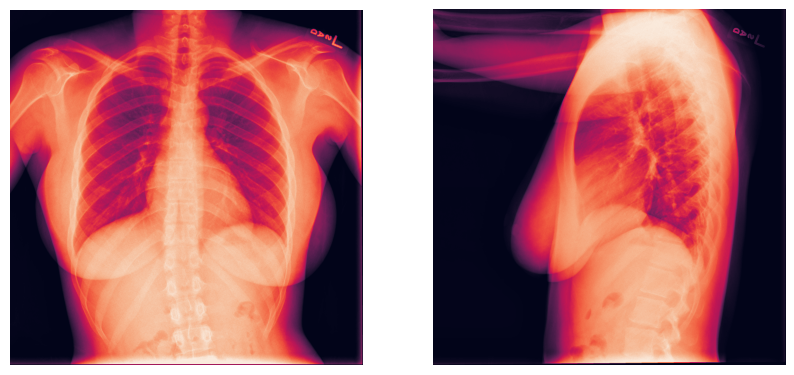


True caption: 'Normal chest'
Predicted caption(greedy search): 'no acute cardiopulmonary abnormalities.'


In [ ]:
k = 3
image1,image2 = test['image_1'][k],test['image_2'][k]
true_caption = test['impression'][k]
inference(image1,image2,true_caption)

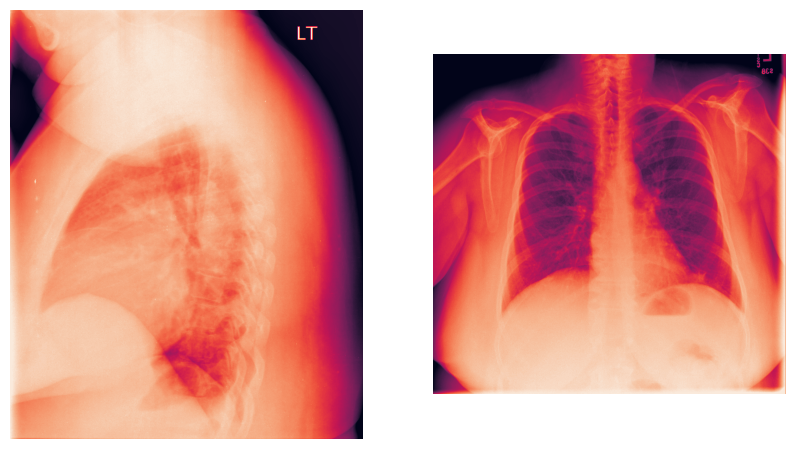


True caption: 'Stable moderate cardiomegaly with prominent central pulmonary vasculature'
Predicted caption(greedy search): 'low lung volumes with bronchovascular crowding, no acute cardiopulmonary abnormalities.'


In [ ]:
k = 536
image1,image2 = test['image_1'][k],test['image_2'][k]
true_caption = test['impression'][k]
inference(image1,image2,true_caption)

In [ ]:
# model.save('/content/drive/MyDrive/Image_captions/ALL_LSTM_E&D_global_attention.h5')

In [ ]:
# prompt: save history model

# ... (Your existing code) ...

# Save the training history to a file
history_filename = 'training_history.pkl'
history_save = os.path.join('/content/drive/MyDrive/Image_captions', history_filename)
joblib.dump(history.history, history_save)

# ... (Rest of your code) ...